In [1]:
!pip install pytorch-fid

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from sklearn.model_selection import train_test_split
import shutil
from pytorch_fid import fid_score
import torch
from tqdm import tqdm
from torchvision import transforms
from pytorch_fid import fid_score



In [3]:
def process_and_save_txt_file(file_path, output_folder):
    try:
        data = np.loadtxt(file_path)
        fs = 178
        f, t, Sxx = spectrogram(data, fs)
        plt.figure(figsize=(8, 4))
        plt.pcolormesh(t, f, np.log(Sxx + 1e-10), cmap='viridis')
        plt.axis('off')
        file_name = os.path.splitext(os.path.basename(file_path))[0]
        image_path = os.path.join(output_folder, f'{file_name}_spectrogram.png')
        plt.savefig(image_path, bbox_inches='tight', pad_inches=0)
        plt.close()
        print(f"Saved: {file_name}_spectrogram.png")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
main_directory ='/Users/mohamedeldagla/Desktop/senior year/New Trends in AI/Epilepsy - GANs/Data'

for folder_name in ['A', 'B', 'C', 'D', 'E']:
    folder_path = os.path.join(main_directory, folder_name)
    output_folder = os.path.join(main_directory, f'{folder_name}_images')
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(folder_path):
        if filename.lower().endswith('.txt'):  # Process both .txt and .TXT files
            file_path = os.path.join(folder_path, filename)
            process_and_save_txt_file(file_path, output_folder)
            print(f"Processed: {filename}")

    print(f"Folder {folder_name} processed. Images saved in: {output_folder}")


Saved: Z038_spectrogram.png
Processed: Z038.txt
Saved: Z004_spectrogram.png
Processed: Z004.txt
Saved: Z010_spectrogram.png
Processed: Z010.txt
Saved: Z011_spectrogram.png
Processed: Z011.txt
Saved: Z005_spectrogram.png
Processed: Z005.txt
Saved: Z039_spectrogram.png
Processed: Z039.txt
Saved: Z013_spectrogram.png
Processed: Z013.txt
Saved: Z007_spectrogram.png
Processed: Z007.txt
Saved: Z006_spectrogram.png
Processed: Z006.txt
Saved: Z012_spectrogram.png
Processed: Z012.txt
Saved: Z016_spectrogram.png
Processed: Z016.txt
Saved: Z002_spectrogram.png
Processed: Z002.txt
Saved: Z003_spectrogram.png
Processed: Z003.txt
Saved: Z017_spectrogram.png
Processed: Z017.txt
Saved: Z001_spectrogram.png
Processed: Z001.txt
Saved: Z015_spectrogram.png
Processed: Z015.txt
Saved: Z029_spectrogram.png
Processed: Z029.txt
Saved: Z028_spectrogram.png
Processed: Z028.txt
Saved: Z014_spectrogram.png
Processed: Z014.txt
Saved: Z067_spectrogram.png
Processed: Z067.txt
Saved: Z073_spectrogram.png
Processed: Z

In [5]:
image_folders = {
    'healthy': ['A_images', 'B_images'],
    'pre-ictal': ['C_images', 'D_images'],
    'epilepsy': ['E_images']
}

merged_dir = os.path.join(main_directory, 'Images/Three-Classes/Merged')
os.makedirs(merged_dir, exist_ok=True)

for category, folders in image_folders.items():
    category_dir = os.path.join(merged_dir, category)
    os.makedirs(category_dir, exist_ok=True)
    for folder in folders:
        folder_path = os.path.join(main_directory, folder)
        for filename in os.listdir(folder_path):
            if filename.endswith('.png'):
                file_path = os.path.join(folder_path, filename)
                dest_path = os.path.join(category_dir, f"{folder}_{filename}")
                shutil.copy(file_path, dest_path)
                print(f"Copied: {filename} to {category}")

print("Images merged into categories successfully.")


Copied: Z065_spectrogram.png to healthy
Copied: Z058_spectrogram.png to healthy
Copied: Z022_spectrogram.png to healthy
Copied: Z084_spectrogram.png to healthy
Copied: Z006_spectrogram.png to healthy
Copied: Z041_spectrogram.png to healthy
Copied: Z092_spectrogram.png to healthy
Copied: Z009_spectrogram.png to healthy
Copied: Z034_spectrogram.png to healthy
Copied: Z073_spectrogram.png to healthy
Copied: Z057_spectrogram.png to healthy
Copied: Z010_spectrogram.png to healthy
Copied: Z017_spectrogram.png to healthy
Copied: Z050_spectrogram.png to healthy
Copied: Z074_spectrogram.png to healthy
Copied: Z049_spectrogram.png to healthy
Copied: Z033_spectrogram.png to healthy
Copied: Z095_spectrogram.png to healthy
Copied: Z046_spectrogram.png to healthy
Copied: Z001_spectrogram.png to healthy
Copied: Z018_spectrogram.png to healthy
Copied: Z083_spectrogram.png to healthy
Copied: Z025_spectrogram.png to healthy
Copied: Z062_spectrogram.png to healthy
Copied: Z051_spectrogram.png to healthy


In [6]:
image_folders = ['epilepsy', 'healthy', 'pre-ictal']

train_dir = os.path.join(merged_dir, 'Train')
val_dir = os.path.join(merged_dir, 'Validation')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

for folder in image_folders:
    folder_path = os.path.join(merged_dir, folder)
    train_folder = os.path.join(train_dir, folder)
    val_folder = os.path.join(val_dir, folder)
    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(val_folder, exist_ok=True)

    image_files = os.listdir(folder_path)
    train_files, val_files = train_test_split(image_files, test_size=0.2, random_state=42)

    for file in train_files:
        shutil.copy(os.path.join(folder_path, file), os.path.join(train_folder, file))

    for file in val_files:
        shutil.copy(os.path.join(folder_path, file), os.path.join(val_folder, file))

print("Dataset split into train and validation sets successfully.")


Dataset split into train and validation sets successfully.


Second Part:
Genarte Data for the three classes Using:
 1. Conditional GAN (CGAN)
 2. Wasserstein GAN (WGAN)

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from sklearn.model_selection import train_test_split
import shutil
import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import make_grid
from torch.utils.data import DataLoader,Dataset

In [8]:
from PIL import Image
class SpectrogramDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []

        categories = ['epilepsy', 'healthy', 'pre-ictal']
        for label, category in enumerate(categories):
            category_dir = os.path.join(data_dir, category)
            for img_name in os.listdir(category_dir):
                if img_name.endswith('.png'):
                    self.image_paths.append(os.path.join(category_dir, img_name))
                    self.labels.append(label)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        img = Image.open(img_path).convert('L')
        img_width, img_height = img.size
        if self.transform:
            img = self.transform(img)

        return img, label


In [9]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

train_dir = '/Users/mohamedeldagla/Desktop/senior year/New Trends in AI/Epilepsy - GANs/Data/Images/Three-Classes/Merged/Train'
val_dir = '/Users/mohamedeldagla/Desktop/senior year/New Trends in AI/Epilepsy - GANs/Data/Images/Three-Classes/Merged/Validation'

train_dataset = SpectrogramDataset(data_dir=train_dir, transform=transform)
val_dataset = SpectrogramDataset(data_dir=val_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)


In [10]:
torch.manual_seed(0)  # Set for testing

def show_tensor_images(image_tensor, num_images=25, size=(1, 28, 28)):
    '''
    Function for visualizing images: Given a tensor of images, number of images, and
    size per image, plots and prints the images in an uniform grid.
    '''
    image_tensor = (image_tensor + 1) / 2
    image_unflat = image_tensor.detach().cpu()
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()

def make_grad_hook():
    '''
    Function to keep track of gradients for visualization purposes,
    which fills the grads list when using model.apply(grad_hook).
    '''
    grads = []
    def grad_hook(m):
        if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
            grads.append(m.weight.grad)
    return grads, grad_hook

In [11]:
class Generator(nn.Module):
    def __init__(self, z_dim=10, im_chan=1, hidden_dim=64):
        super(Generator, self).__init__()
        self.z_dim = z_dim
        self.gen = nn.Sequential(
            self.make_gen_block(z_dim, hidden_dim * 4),
            self.make_gen_block(hidden_dim * 4, hidden_dim * 2, kernel_size=4, stride=1),
            self.make_gen_block(hidden_dim * 2, hidden_dim),
            self.make_gen_block(hidden_dim, im_chan, kernel_size=4, final_layer=True),
        )

    def make_gen_block(self, input_channels, output_channels, kernel_size=3, stride=2, final_layer=False):
        if not final_layer:
            return nn.Sequential(
                nn.ConvTranspose2d(input_channels, output_channels, kernel_size, stride),
                nn.BatchNorm2d(output_channels),
                nn.ReLU(inplace=True),
            )
        else:
            return nn.Sequential(
                nn.ConvTranspose2d(input_channels, output_channels, kernel_size, stride),
                nn.Tanh(),
            )

    def forward(self, noise):
        x = noise.view(len(noise), self.z_dim, 1, 1)
        return self.gen(x)

def get_noise(n_samples, z_dim, device='cpu'):
    return torch.randn(n_samples, z_dim, device=device)


In [12]:
class Critic(nn.Module):
    def __init__(self, im_chan=1, hidden_dim=64):
        super(Critic, self).__init__()
        self.crit = nn.Sequential(
            self.make_crit_block(im_chan, hidden_dim),
            self.make_crit_block(hidden_dim, hidden_dim * 2),
            self.make_crit_block(hidden_dim * 2, 1, final_layer=True),
        )

    def make_crit_block(self, input_channels, output_channels, kernel_size=4, stride=2, final_layer=False):
        if not final_layer:
            return nn.Sequential(
                nn.Conv2d(input_channels, output_channels, kernel_size, stride),
                nn.BatchNorm2d(output_channels),
                nn.LeakyReLU(0.2, inplace=True),
            )
        else:
            return nn.Sequential(
                nn.Conv2d(input_channels, output_channels, kernel_size, stride),
            )

    def forward(self, image):
        crit_pred = self.crit(image)
        return crit_pred.view(len(crit_pred), -1)


In [13]:
n_epochs = 50
z_dim = 64
display_step = 50
batch_size = 128
lr = 0.0002
beta_1 = 0.5
beta_2 = 0.999
c_lambda = 10
crit_repeats = 5

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
gen = Generator(z_dim=z_dim).to(device)
crit = Critic().to(device)

gen_opt = torch.optim.Adam(gen.parameters(), lr=lr, betas=(beta_1, beta_2))
crit_opt = torch.optim.Adam(crit.parameters(), lr=lr, betas=(beta_1, beta_2))


In [14]:
import torch
from torch.autograd import Variable

def calc_gradient_penalty(critic, real, fake, device="cuda"):
    """
    Calculate the gradient penalty for WGAN-GP.

    Args:
    - critic: The critic (discriminator) model.
    - real: A batch of real images.
    - fake: A batch of fake images generated by the generator.
    - device: The device to perform the calculations .

    Returns:
    - The gradient penalty value.
    """
    #weight (real and fake)
    alpha = torch.rand(real.size(0), 1, 1, 1, device=device)

    interpolated = alpha * real + (1 - alpha) * fake
    interpolated = interpolated.requires_grad_(True)

    crit_interpolated_pred = critic(interpolated)

    gradients = torch.autograd.grad(
        outputs=crit_interpolated_pred,
        inputs=interpolated,
        grad_outputs=torch.ones_like(crit_interpolated_pred, device=device),
        create_graph=True, retain_graph=True, only_inputs=True
    )[0]

    # L2 norm
    gradients = gradients.view(gradients.size(0), -1)
    grad_norm = gradients.norm(2, dim=1)

    gradient_penalty = ((grad_norm - 1) ** 2).mean()
    return gradient_penalty

In [17]:
import os
import shutil

# Paths to your existing class folders within "Train"
epilepsy_dir = "/Users/mohamedeldagla/Desktop/senior year/New Trends in AI/Epilepsy - GANs/Data/Images/Three-Classes/Merged/Train/epilepsy"
healthy_dir = "/Users/mohamedeldagla/Desktop/senior year/New Trends in AI/Epilepsy - GANs/Data/Images/Three-Classes/Merged/Train/healthy"
preictal_dir = "/Users/mohamedeldagla/Desktop/senior year/New Trends in AI/Epilepsy - GANs/Data/Images/Three-Classes/Merged/Train/pre-ictal"

# Create a new folder called "all_real_images" within the same "Train" directory
all_real_images_dir = "/Users/mohamedeldagla/Desktop/senior year/New Trends in AI/Epilepsy - GANs/Data/Images/Three-Classes/Merged/Train/all_real_images"
os.makedirs(all_real_images_dir, exist_ok=True)

def merge_folder_images(src_folder, dst_folder):
    for filename in os.listdir(src_folder):
        if filename.lower().endswith(".png"):
            src_path = os.path.join(src_folder, filename)
            dst_path = os.path.join(dst_folder, filename)
            shutil.copy(src_path, dst_path)
            print(f"Copied {filename} to {dst_folder}")

# Merge images from each subfolder into "all_real_images"
merge_folder_images(epilepsy_dir, all_real_images_dir)
merge_folder_images(healthy_dir, all_real_images_dir)
merge_folder_images(preictal_dir, all_real_images_dir)

print("All real images merged into:", all_real_images_dir)

Copied E_images_S080_spectrogram.png to /Users/mohamedeldagla/Desktop/senior year/New Trends in AI/Epilepsy - GANs/Data/Images/Three-Classes/Merged/Train/all_real_images
Copied E_images_S026_spectrogram.png to /Users/mohamedeldagla/Desktop/senior year/New Trends in AI/Epilepsy - GANs/Data/Images/Three-Classes/Merged/Train/all_real_images
Copied E_images_S099_spectrogram.png to /Users/mohamedeldagla/Desktop/senior year/New Trends in AI/Epilepsy - GANs/Data/Images/Three-Classes/Merged/Train/all_real_images
Copied E_images_S045_spectrogram.png to /Users/mohamedeldagla/Desktop/senior year/New Trends in AI/Epilepsy - GANs/Data/Images/Three-Classes/Merged/Train/all_real_images
Copied E_images_S078_spectrogram.png to /Users/mohamedeldagla/Desktop/senior year/New Trends in AI/Epilepsy - GANs/Data/Images/Three-Classes/Merged/Train/all_real_images
Copied E_images_S030_spectrogram.png to /Users/mohamedeldagla/Desktop/senior year/New Trends in AI/Epilepsy - GANs/Data/Images/Three-Classes/Merged/Tr

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 1/50 | Gen Loss: -0.0560 | Crit Loss: 0.0411


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 2/50 | Gen Loss: -0.0653 | Crit Loss: 0.0425


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 3/50 | Gen Loss: -0.0602 | Crit Loss: 0.0203


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 4/50 | Gen Loss: -0.0550 | Crit Loss: 0.0236


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 5/50 | Gen Loss: -0.0481 | Crit Loss: 0.0233


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 6/50 | Gen Loss: -0.0365 | Crit Loss: 0.0103


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 7/50 | Gen Loss: -0.0311 | Crit Loss: 0.0161


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 8/50 | Gen Loss: -0.0205 | Crit Loss: 0.0163


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 9/50 | Gen Loss: -0.0157 | Crit Loss: 0.0259


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 10/50 | Gen Loss: -0.0102 | Crit Loss: 0.0177


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 11/50 | Gen Loss: -0.0102 | Crit Loss: 0.0599


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 12/50 | Gen Loss: -0.0044 | Crit Loss: 0.0520


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 13/50 | Gen Loss: -0.0026 | Crit Loss: 0.0073


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 14/50 | Gen Loss: -0.0166 | Crit Loss: 0.0058


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 15/50 | Gen Loss: -0.0141 | Crit Loss: 0.0515


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 16/50 | Gen Loss: -0.0251 | Crit Loss: 0.0025


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 17/50 | Gen Loss: -0.0241 | Crit Loss: 0.0227


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 18/50 | Gen Loss: -0.0312 | Crit Loss: 0.0087


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 19/50 | Gen Loss: -0.0373 | Crit Loss: 0.0069


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 20/50 | Gen Loss: -0.0434 | Crit Loss: 0.0115


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 21/50 | Gen Loss: -0.0536 | Crit Loss: 0.0010


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 22/50 | Gen Loss: -0.0623 | Crit Loss: -0.0009


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 23/50 | Gen Loss: -0.0675 | Crit Loss: 0.0215


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 24/50 | Gen Loss: -0.0377 | Crit Loss: 0.0285


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 25/50 | Gen Loss: 0.0015 | Crit Loss: -0.0085


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 26/50 | Gen Loss: 0.0573 | Crit Loss: -0.0052


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 27/50 | Gen Loss: 0.0597 | Crit Loss: -0.0067


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 28/50 | Gen Loss: -0.0081 | Crit Loss: 0.0254


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 29/50 | Gen Loss: -0.1356 | Crit Loss: -0.0534


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 30/50 | Gen Loss: -0.2805 | Crit Loss: -0.0152


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 31/50 | Gen Loss: -0.3137 | Crit Loss: 0.0151


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 32/50 | Gen Loss: -0.2579 | Crit Loss: 0.0119


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 33/50 | Gen Loss: -0.1672 | Crit Loss: 0.0067


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 34/50 | Gen Loss: -0.0594 | Crit Loss: 0.0733


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 35/50 | Gen Loss: 0.0296 | Crit Loss: 0.0078


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 36/50 | Gen Loss: 0.1081 | Crit Loss: 0.0101


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 37/50 | Gen Loss: 0.1621 | Crit Loss: 0.0033


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 38/50 | Gen Loss: 0.1472 | Crit Loss: 0.0169


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 39/50 | Gen Loss: 0.0643 | Crit Loss: 0.0226


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 40/50 | Gen Loss: -0.0430 | Crit Loss: -0.0169


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 41/50 | Gen Loss: -0.0958 | Crit Loss: -0.0280


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 42/50 | Gen Loss: -0.0941 | Crit Loss: 0.0426


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 43/50 | Gen Loss: -0.0379 | Crit Loss: 0.0978


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 44/50 | Gen Loss: -0.0005 | Crit Loss: 0.0051


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 45/50 | Gen Loss: 0.0803 | Crit Loss: 0.0633


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 46/50 | Gen Loss: 0.1251 | Crit Loss: -0.0089


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 47/50 | Gen Loss: 0.1134 | Crit Loss: 0.0433


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 48/50 | Gen Loss: 0.0960 | Crit Loss: -0.0166


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 49/50 | Gen Loss: 0.1014 | Crit Loss: -0.0147


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 50/50 | Gen Loss: 0.1627 | Crit Loss: -0.0088


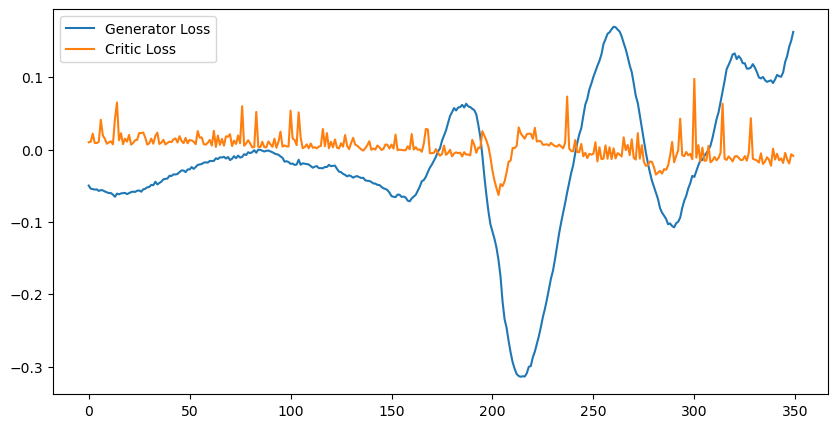

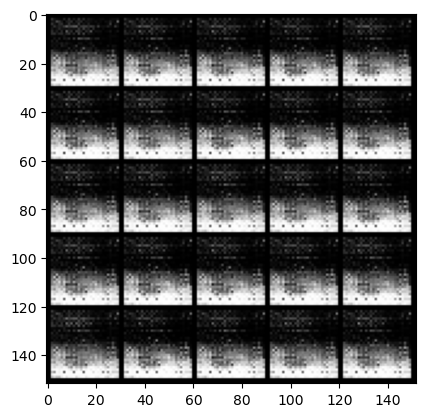

100%|██████████| 4/4 [00:31<00:00,  7.96s/it]


FID Score at Epoch 50: 394.4171


In [20]:
real_images_dir = "/Users/mohamedeldagla/Desktop/senior year/New Trends in AI/Epilepsy - GANs/Data/Images/Three-Classes/Merged/Train/all_real_images"
fid_generated_dir = "/Users/mohamedeldagla/Desktop/senior year/New Trends in AI/Epilepsy - GANs/Source Code/Data/fid_generated_images"
os.makedirs(fid_generated_dir, exist_ok=True)

generator_losses = []
critic_losses = []

resize_transform = transforms.Resize((64, 64))

for epoch in range(n_epochs):
    gen.train()
    crit.train()

    for real, _ in tqdm(train_loader):
        cur_batch_size = len(real)
        real = real.to(device)
        real = real * 2 - 1  # Normalize to [-1, 1]

        real = resize_transform(real)

        # Train Critic
        for _ in range(crit_repeats):
            noise = get_noise(cur_batch_size, z_dim, device=device)
            fake = gen(noise)
            fake = resize_transform(fake)
            crit_opt.zero_grad()
            real_pred = crit(real)
            fake_pred = crit(fake.detach())
            gradient_penalty = calc_gradient_penalty(crit, real, fake, device=device)
            crit_loss = -(real_pred.mean() - fake_pred.mean()) + c_lambda * gradient_penalty
            crit_loss.backward()
            crit_opt.step()

        # Train Generator
        gen_opt.zero_grad()
        noise = get_noise(cur_batch_size, z_dim, device=device)
        fake = gen(noise)
        fake = resize_transform(fake)
        fake_pred = crit(fake)
        gen_loss = -fake_pred.mean()
        gen_loss.backward()
        gen_opt.step()

        # Save losses
        generator_losses.append(gen_loss.item())
        critic_losses.append(crit_loss.item())

    print(f'Epoch {epoch+1}/{n_epochs} | Gen Loss: {gen_loss.item():.4f} | Crit Loss: {crit_loss.item():.4f}')

    # ----- DISPLAY & FID CALCULATION EVERY 'display_step' EPOCHS ----- #
    if (epoch + 1) % display_step == 0:
        # 1) Plot losses
        plt.figure(figsize=(10, 5))
        plt.plot(generator_losses, label='Generator Loss')
        plt.plot(critic_losses, label='Critic Loss')
        plt.legend()
        plt.show()

        # 2) Show sample generated images
        with torch.no_grad():
            fake_images = gen(get_noise(25, z_dim, device=device))
            show_tensor_images(fake_images, num_images=25)

        # 3) Save a batch of generated images for FID

        with torch.no_grad():
            noise = get_noise(200, z_dim, device=device)
            batch_fake = gen(noise)
            # Convert [-1,1] -> [0,255] for saving
            for i, img in enumerate(batch_fake):
                img = ((img + 1) / 2 * 255).clamp(0, 255).byte()
                pil_img = transforms.ToPILImage()(img.squeeze(0).cpu())
                pil_img.save(os.path.join(fid_generated_dir, f"epoch{epoch+1}_img{i}.png"))

        # 4) Calculate FID Score
        fid_value = fid_score.calculate_fid_given_paths(
            [real_images_dir, fid_generated_dir],
            batch_size=50,
            device=device,
            dims=2048  # Default feature dimension for InceptionV3
        )
        print(f"FID Score at Epoch {epoch+1}: {fid_value:.4f}")

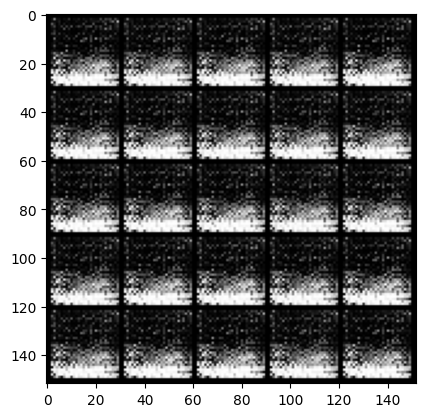

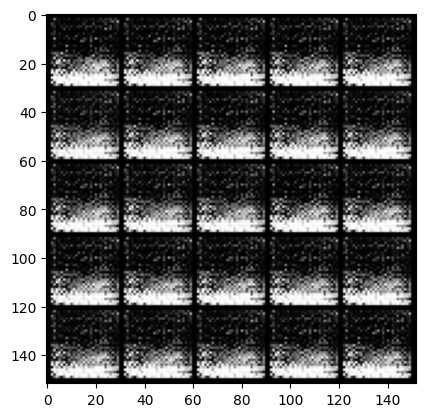

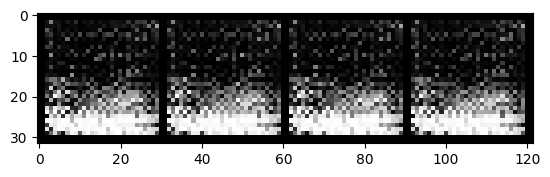

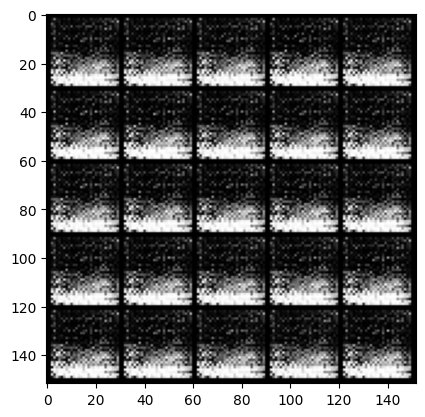

In [ ]:
def validate(model, val_loader, device):
    model.eval()
    with torch.no_grad():
        for real, _ in val_loader:
            real = real.to(device)
            real = real * 2 - 1  # Normalize to [-1, 1]

            noise = get_noise(len(real), z_dim, device=device)
            fake = model(noise)

            show_tensor_images(fake, num_images=25)

validate(gen, val_loader, device)

with torch.no_grad():
    fake_images = gen(get_noise(25, z_dim, device=device))
    show_tensor_images(fake_images, num_images=25)

In [ ]:
pip install pytorch-fid

Third Part: We need to evaluate the performance of each generative model and it's effect on the perfomance of the model. As a result: Train the data after augmentation using:

Simple CNN.
Resnet 50.
XGBoost. Then Compare the results.

1. Simple CNN
2. Resnet 50
3. XGBoost.






In [ ]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20, patience=5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    train_losses, val_losses = [], []
    best_val_loss = float("inf")
    patience_counter = 0

    for epoch in range(num_epochs):
        # Training Phase
        model.train()
        running_loss, running_corrects = 0.0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        epoch_train_loss = running_loss / len(train_loader.dataset)
        epoch_train_acc = running_corrects.double() / len(train_loader.dataset)
        train_losses.append(epoch_train_loss)

        # Validation Phase
        model.eval()
        val_running_loss, val_running_corrects = 0.0, 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_running_corrects += torch.sum(preds == labels.data)

        epoch_val_loss = val_running_loss / len(val_loader.dataset)
        epoch_val_acc = val_running_corrects.double() / len(val_loader.dataset)
        val_losses.append(epoch_val_loss)

        print(f"Epoch {epoch+1}/{num_epochs} | "
              f"Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.4f} | "
              f"Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.4f}")

        # Early Stopping Logic
        if epoch_val_loss < best_val_loss:
            best_val_loss = epoch_val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered.")
                break

    return model, train_losses, val_losses

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, models
from sklearn.metrics import accuracy_score
import xgboost as xgb
import numpy as np


class SimpleCNN(nn.Module):
    def __init__(self, num_classes=3):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(self._get_classifier_input_size(), 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, num_classes)
        )

    def _get_classifier_input_size(self):
            img_width, img_height = self.get_image_dimensions()
            dummy_input = torch.zeros(1, 1, img_height, img_width)
            output = self.features(dummy_input)
            return output.view(1, -1).size(1)

    def get_image_dimensions(self):
            dataset = SpectrogramDataset(data_dir=train_dir, transform=transform)
            img, _ = dataset[0]
            return img.shape[1], img.shape[2]

    def forward(self, x):
            x = self.features(x)
            x = x.view(x.size(0), -1)
            x = self.classifier(x)
            return x

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
class EarlyStopping:
    def __init__(self, patience=5, delta=0):
        self.patience = patience
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.delta = delta

    def __call__(self, val_loss):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.counter = 0

In [ ]:
cnn_model = SimpleCNN().to(device)
resnet_model = models.resnet50(pretrained=True)
resnet_model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
resnet_model.fc = nn.Linear(resnet_model.fc.in_features, 3)
resnet_model = resnet_model.to(device)


criterion = nn.CrossEntropyLoss()
cnn_optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)
resnet_optimizer = optim.Adam(resnet_model.parameters(), lr=0.001)


early_stopping = EarlyStopping(patience=5, delta=0.001)

num_epochs = 20

import matplotlib.pyplot as plt


train_losses, train_accuracies = [], []

for epoch in range(num_epochs):
    cnn_model.train()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        cnn_optimizer.zero_grad()
        outputs = cnn_model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        loss.backward()
        cnn_optimizer.step()


        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_corrects.double() / len(train_dataset)

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc.item())

    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Training Loss: {epoch_loss:.4f}, '
          f'Training Accuracy: {epoch_acc:.4f}')



In [ ]:
cnn_model.eval()
val_running_loss = 0.0
val_running_corrects = 0

with torch.no_grad():
    for val_inputs, val_labels in val_loader:
        val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
        val_outputs = cnn_model(val_inputs)
        _, val_preds = torch.max(val_outputs, 1)
        val_loss = criterion(val_outputs, val_labels)


        val_running_loss += val_loss.item() * val_inputs.size(0)
        val_running_corrects += torch.sum(val_preds == val_labels.data)

val_loss = val_running_loss / len(val_dataset)
val_acc = val_running_corrects.double() / len(val_dataset)

print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


cnn_model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for val_inputs, val_labels in val_loader:
        val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
        val_outputs = cnn_model(val_inputs)
        _, val_preds = torch.max(val_outputs, 1)

        all_preds.extend(val_preds.cpu().numpy())
        all_labels.extend(val_labels.cpu().numpy())

precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')